# **Fraud detection classification**

### **1. Problem**
We aim to detect fraudulent transactions using machine learning. The dataset is highly imbalanced, with fraud making up a small percentage (~0.24%). The experiment involves preprocessing, dimensionality reduction, handling imbalance, and training two models: Random Forest and Neural Networks.

We use the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset from kaggle.

---

### **2. Steps in the Experiment**

#### **Data Preprocessing**
1. **Handling Missing Values:**
   - Found missing values in `V27`, `V28`, `Amount`, and `Class`.
   - The missing target (`Class`) rows were removed, as they cannot contribute to supervised learning.
   - Remaining missing values in other columns were filled with the **median**, a robust method for skewed datasets.

2. **Target Variable Distribution:**
   - The `Class` variable was highly imbalanced (fraud ~0.24% of data). This imbalance was addressed using **SMOTE** (Synthetic Minority Oversampling Technique), which generates synthetic samples of the minority class.

#### **Dimensionality Reduction (PCA)**
- Principal Component Analysis (PCA) was used to reduce the dataset dimensions while retaining 95% of the variance.
- The cumulative explained variance plot helped determine the **optimal number of PCA components** (15 in this case).
- PCA improved computational efficiency and reduced redundancy in the features.

#### **Train-Test Split**
- The PCA-transformed dataset was split into **80% training** and **20% testing**, ensuring unbiased model evaluation.

#### **Model Training**
1. **Random Forest Classifier:**
   - A robust ensemble model that combines multiple decision trees to improve performance.
   - It naturally handles feature importance, reducing overfitting.

2. **Neural Network Classifier:**
   - A feed-forward Neural Network with one hidden layer (100 nodes) trained for up to 300 iterations.
   - Suitable for capturing complex patterns in data.

#### **Cross-Validation**
To ensure that the models generalize well to unseen data, we used Stratified K-Fold Cross-Validation, which ensures that each fold maintains the same class distribution as the entire dataset (important for imbalanced datasets like this one).
* StratifiedKFold was used with 5 splits to divide the dataset into training and testing sets.
* Cross-validation scores (cv_scores_rf and cv_scores_mlp):
These provide the accuracy (or other specified metrics) for each fold. Mean and standard deviation summarize the model's performance across all folds. High variance might indicate the model is sensitive to the data split, while low variance suggests stable performance.

#### **Evaluation Metrics**
- We evaluate multiple metrics like accuracy, precision, recall, and
F1-score.
- Accuracy measures the proportion of correct predictions.
- Precision indicates how many of the predicted fraud cases were actually fraud.
- Recall shows how many actual fraud cases were correctly predicted.
- F1-score balances precision and recall, which is particularly useful when the dataset is imbalanced.
---

### **3. Results**

#### **Model Performance**
- Both models perform extremely well, with accuracy, precision, recall, and F1-score all nearing 100%.
- The Neural Network model has a slightly better recall (1.0000) than the Random Forest, meaning it does not miss any fraud cases. However, this may come at the cost of slightly lower precision.
- The Random Forest model has a slightly better precision (0.9996), indicating that it is more conservative when predicting fraud cases, reducing the risk of false positives.
- Despite these minor differences, both models are highly effective and suitable for fraud detection.
- Neural Network might be more favorable if maximizing recall (identifying every fraudulent transaction) is more important, as it achieves perfect recall.
---

### **4. Analysis and Insights**

1. **Handling Imbalance:**  
   - Using **SMOTE** balanced the dataset effectively, ensuring that the models learned both classes equally well.

2. **PCA:**  
   - Reduced dimensions from 30 to 15 while retaining 95% variance. This optimized training time and avoided overfitting.

3. **Model Performance:**  
   - Both models performed exceptionally well. The slight edge of Neural Networks in accuracy may be due to their ability to learn non-linear patterns.
   - Given the near-perfect results, this might indicate **overfitting**, especially if the test set distribution matches the training data too closely.

4. **Fraud Detection Challenges:**  
   - Real-world fraud detection often involves noisier data and evolving patterns. These results may not generalize well to unseen, real-time data without continuous retraining and monitoring.

---

### **5. Thoughts for Future Work**
1. **Evaluate on Realistic Data Splits:**
   - Use time-based splits (e.g., train on older data, test on newer data) to simulate real-world fraud detection scenarios.

2. **Hyperparameter Tuning:**
   - Tune hyperparameters (e.g., number of trees for Random Forest, number of layers/units for the Neural Network) to potentially improve performance further.

3. **Threshold Optimization:**
   - Fine-tune the decision threshold for fraud detection, balancing precision and recall based on business needs.

4. **Feature Engineering:**
   - Investigate domain-specific features or external data (e.g., transaction frequency, time of day) that could improve the model’s ability to detect fraud.

---

### **Conclusion**
Both models demonstrate excellent performance with nearly perfect metrics, showcasing the effectiveness of PCA, SMOTE, and robust classifiers. However, the high performance should be interpreted cautiously, as real-world challenges like evolving fraud patterns and noisy data are not reflected in this experiment.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
# Specify delimiter and handle bad lines
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("Missing Values per Column:")
print(df.isnull().sum())

# Summary statistics
print(df.describe())

Dataset Shape: (75357, 31)
Missing Values per Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64
               Time            V1            V2            V3            V4  \
count  75357.000000  75357.000000  75357.000000  75357.000000  75357.000000   
mean   36110.239845     -0.252779     -0.028574      0.678975      0.166227   
std    14826.849221      1.877372      1.660941      1.402475      1.370891   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    29808.000000     -1.014563     -0.595725      0.190522     -0.725740   
50%    39061.000000     -0.246462      0.070645      0.766814      0.185626   
75%    4

In [ ]:
# Remove rows where the target variable (Class) is missing
df = df.dropna(subset=['Class'])

print("Shape after removing rows with missing target:")
print(df.shape)

Shape after removing rows with missing target:
(75356, 31)


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


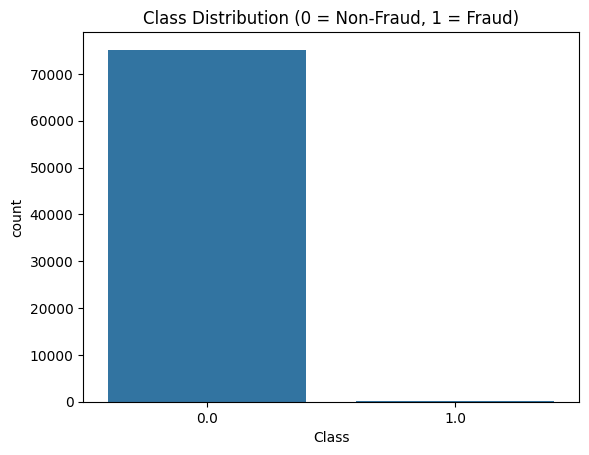

Fraud Percentage: 0.24%


In [ ]:
# Distribution of fraud vs non-fraud transactions
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

# Percentage of fraud
fraud_percentage = df['Class'].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.2f}%")


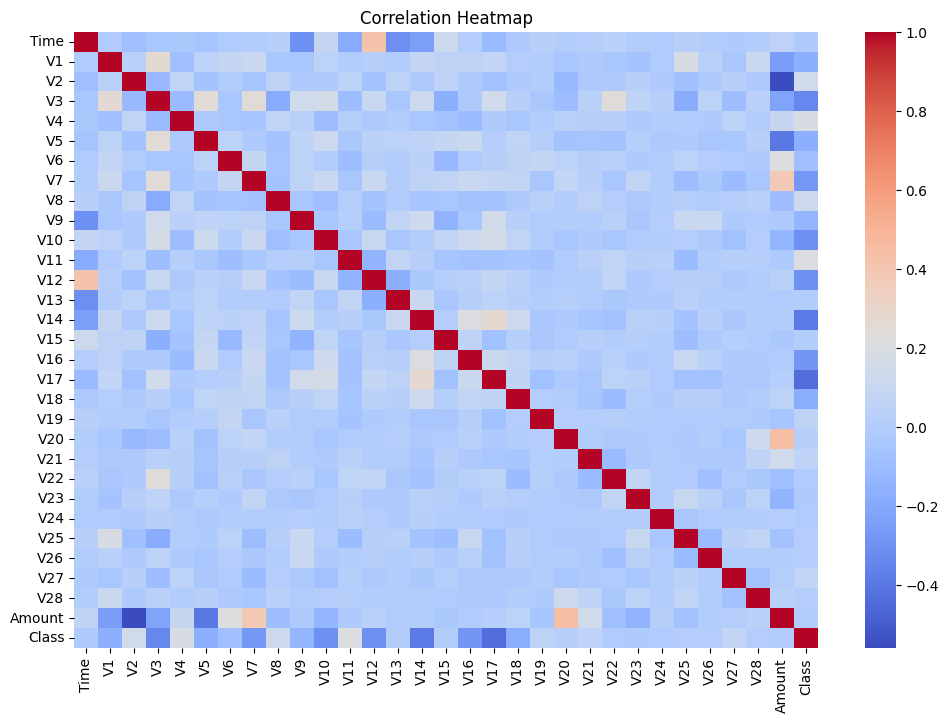

Top 10 Features Correlated with Fraud:
Class    1.000000
V11      0.205568
V4       0.183496
V2       0.142725
V8       0.128200
V27      0.074342
V21      0.056032
V19      0.051328
V20      0.022098
V25      0.012013
Name: Class, dtype: float64


In [ ]:
# Correlation matrix for features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Check top correlated features with the target
target_corr = corr_matrix['Class'].sort_values(ascending=False)
print("Top 10 Features Correlated with Fraud:")
print(target_corr.head(10))


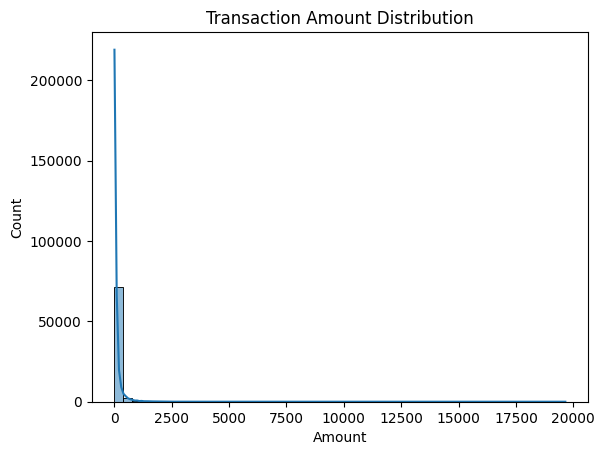

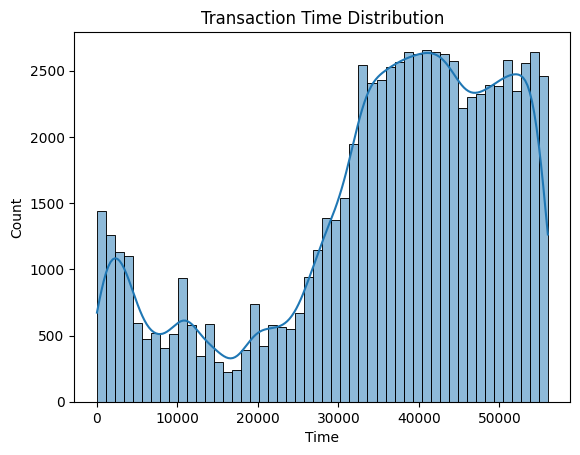

In [ ]:
# Distribution of transaction amounts
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

# Distribution of transaction times
sns.histplot(df['Time'], kde=True, bins=50)
plt.title("Transaction Time Distribution")
plt.show()


<ipython-input-19-2ad203b85eac>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
<ipython-input-19-2ad203b85eac>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)


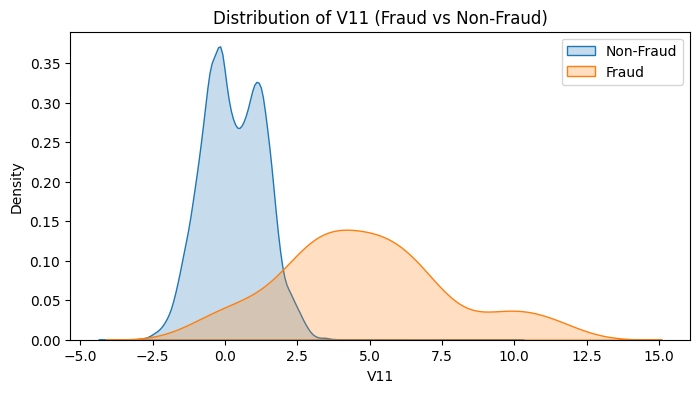

<ipython-input-19-2ad203b85eac>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
<ipython-input-19-2ad203b85eac>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)


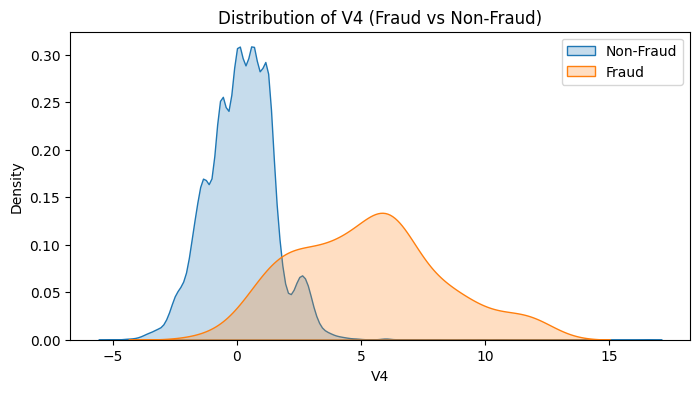

<ipython-input-19-2ad203b85eac>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
<ipython-input-19-2ad203b85eac>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)


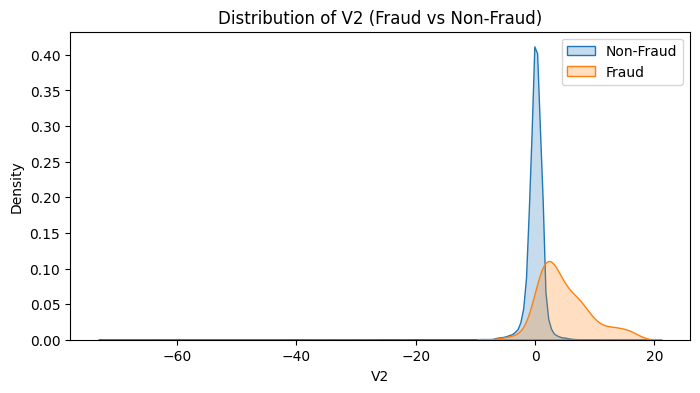

<ipython-input-19-2ad203b85eac>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
<ipython-input-19-2ad203b85eac>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)


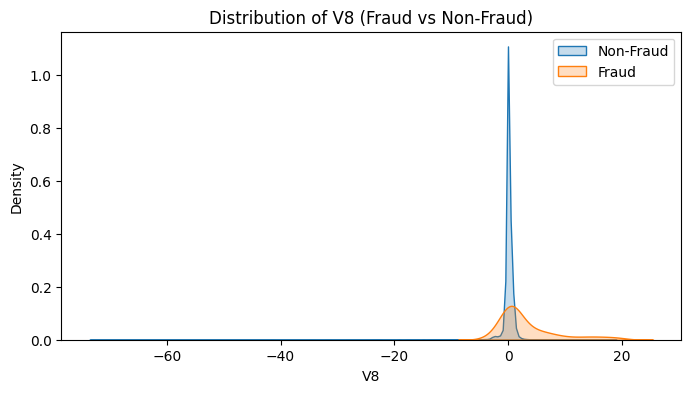

<ipython-input-19-2ad203b85eac>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
<ipython-input-19-2ad203b85eac>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)


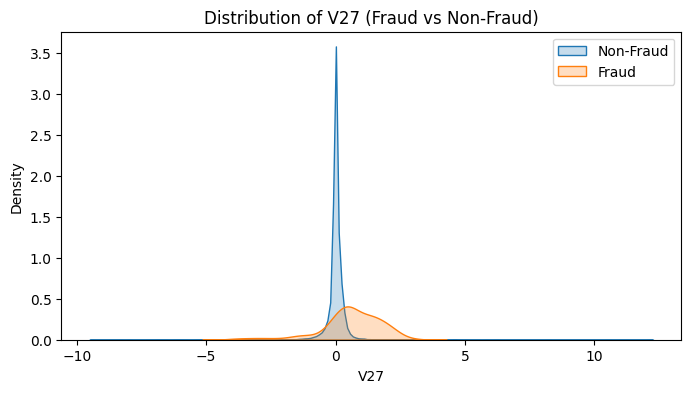

In [ ]:
#Feature distributions between fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

for col in ['V11', 'V4', 'V2', 'V8', 'V27']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(non_fraud[col], label='Non-Fraud', shade=True)
    sns.kdeplot(fraud[col], label='Fraud', shade=True)
    plt.title(f"Distribution of {col} (Fraud vs Non-Fraud)")
    plt.legend()
    plt.show()


In [ ]:
# Chi-square test for correlation
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['V11'] > 0, df['Class']))
print(f"Chi-square Test Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print("Significant correlation detected.")
else:
    print("No significant correlation.")


Chi-square Test Statistic: 113.2311032914917, P-value: 1.9203538530859284e-26
Significant correlation detected.


In [ ]:
# Separate features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original Dataset Shape: {df['Class'].value_counts()}")
print(f"Resampled Dataset Shape: {pd.Series(y_resampled).value_counts()}")


In [ ]:
print("Class Distribution Before SMOTE:")
print(df['Class'].value_counts())

# Apply SMOTE after EDA
X = df.drop(columns=['Class'])
y = df['Class']
smote = SMOTE(random_state=17)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution Before SMOTE:
Class
0.0    75173
1.0      183
Name: count, dtype: int64
Class Distribution After SMOTE:
Class
0.0    75173
1.0    75173
Name: count, dtype: int64


## **PCA for Dimensionality Reduction**

To find the optimal number of PCA components, you can analyze the explained variance ratio and choose the smallest number of components that explain a significant amount of variance (ie 95%).

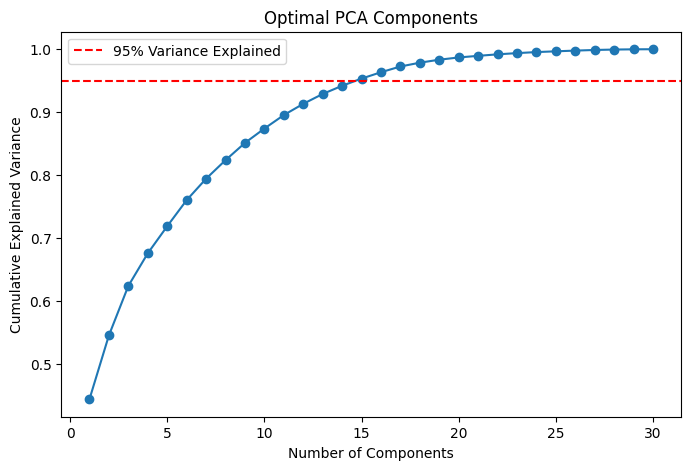

Optimal number of PCA components: 15


In [ ]:
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_resampled)

# Apply PCA without specifying n_components
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Optimal PCA Components")
plt.legend()
plt.show()

# Find the number of components that explain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")

In [ ]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=15, random_state=4)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.44337027 0.1014621  0.07873093 0.05186942 0.0430705  0.04147777
 0.03406597 0.02951683 0.02742766 0.02283109 0.02145829 0.01785798
 0.0157003  0.01301419 0.01143849]


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=4)


### **Random Forest**

Random Forest Cross-Validation Accuracy: 0.9997 ± 0.0001


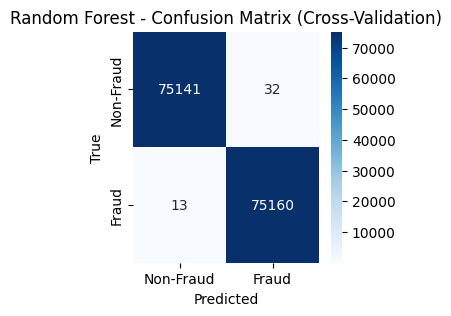

Random Forest Cross-Validation Results: 
Accuracy: 0.9997 ± 0.0001
Precision: 0.9996 ± 0.0001
Recall: 0.9998 ± 0.0002
F1-Score: 0.9997 ± 0.0001


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Random Forest model
rf = RandomForestClassifier(random_state=4)

# Set up StratifiedKFold to maintain the class distribution in each fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

# Cross-validation using cross_val_score (evaluating on accuracy)
cv_scores_rf = cross_val_score(rf, X_pca, y_resampled, cv=cv, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores_rf):.4f} ± {np.std(cv_scores_rf):.4f}")

# Use cross_val_predict to get predicted values for each fold
y_pred_rf = cross_val_predict(rf, X_pca, y_resampled, cv=cv)

# Generate confusion matrix
cm_rf = confusion_matrix(y_resampled, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(3, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Random Forest - Confusion Matrix (Cross-Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation using cross_validate to evaluate multiple metrics
cv_results_rf = cross_validate(rf, X_pca, y_resampled, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

# Print detailed evaluation metrics
print(f"Random Forest Cross-Validation Results: \nAccuracy: {np.mean(cv_results_rf['test_accuracy']):.4f} ± {np.std(cv_results_rf['test_accuracy']):.4f}")
print(f"Precision: {np.mean(cv_results_rf['test_precision']):.4f} ± {np.std(cv_results_rf['test_precision']):.4f}")
print(f"Recall: {np.mean(cv_results_rf['test_recall']):.4f} ± {np.std(cv_results_rf['test_recall']):.4f}")
print(f"F1-Score: {np.mean(cv_results_rf['test_f1']):.4f} ± {np.std(cv_results_rf['test_f1']):.4f}")


### **Neural Network Classifier**

Neural Network Cross-Validation Accuracy: 0.9997 ± 0.0000


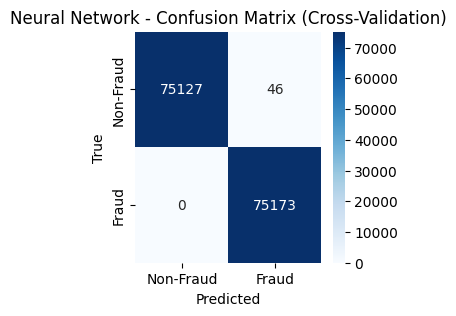

Neural Network Cross-Validation Results: 
Accuracy: 0.9997 ± 0.0000
Precision: 0.9994 ± 0.0000
Recall: 1.0000 ± 0.0000
F1-Score: 0.9997 ± 0.0000


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=5)

# Cross-validation using cross_val_score (evaluating on accuracy)
cv_scores_mlp = cross_val_score(mlp, X_pca, y_resampled, cv=cv, scoring='accuracy')
print(f"Neural Network Cross-Validation Accuracy: {np.mean(cv_scores_mlp):.4f} ± {np.std(cv_scores_mlp):.4f}")

# Use cross_val_predict to get predicted values for each fold
y_pred_mlp = cross_val_predict(mlp, X_pca, y_resampled, cv=cv)

# Generate confusion matrix
cm_mlp = confusion_matrix(y_resampled, y_pred_mlp)

# Plot confusion matrix for Neural Network
plt.figure(figsize=(3, 3))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Neural Network - Confusion Matrix (Cross-Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation using cross_validate to evaluate multiple metrics
cv_results_mlp = cross_validate(mlp, X_pca, y_resampled, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

# Print detailed evaluation metrics
print(f"Neural Network Cross-Validation Results: \nAccuracy: {np.mean(cv_results_mlp['test_accuracy']):.4f} ± {np.std(cv_results_mlp['test_accuracy']):.4f}")
print(f"Precision: {np.mean(cv_results_mlp['test_precision']):.4f} ± {np.std(cv_results_mlp['test_precision']):.4f}")
print(f"Recall: {np.mean(cv_results_mlp['test_recall']):.4f} ± {np.std(cv_results_mlp['test_recall']):.4f}")
print(f"F1-Score: {np.mean(cv_results_mlp['test_f1']):.4f} ± {np.std(cv_results_mlp['test_f1']):.4f}")
